# Analyzing fordgobike trip data
## by Abdulaziz alsheddi
### Preliminary Wrangling
*  ### This data contains good business featrues, to facilitate detection of problems and increase opportunities for improvement and development

In [1]:
# import all packages and set plots to be embedded inline


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb 

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df=pd.read_csv('2017-fordgobike-tripdata.csv')

### What is the structure of your dataset?

> About the data structure, the data was almost clean but there were missing values in only some rows and also I added some columns to help in extracting the knowledge from it.

### What is/are the main feature(s) of interest in your dataset?

> the main featrues that i will foucs on them are duration_sec and start_station_name and member_birth_year

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> added some columns to help like month and user_age and duration_hour

In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 59.5+ MB


In [5]:
# fixing the dtypes problems.
df.start_station_id = df.start_station_id.astype(str)
df.end_station_id = df.end_station_id.astype(str)
df.bike_id = df.bike_id.astype(str)


In [6]:
df['start_station_name'].nunique()

272

In [7]:
# change data types and add new columns


df['start_time']=pd.to_datetime(df['start_time'])
df['month']=df['start_time'].dt.month
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,month
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male,12
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female,12
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN,12
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN,12
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female,12


In [8]:
# add new columns 
df['duration_mun']=df['duration_sec']/60

In [9]:
# add new columns 
df['duration_hour']=(df['duration_sec']/60)/60

In [10]:
# add new columns 
df['user_age']=2017-df['member_birth_year']

> ### We will see which month there are more bike  rental operations 

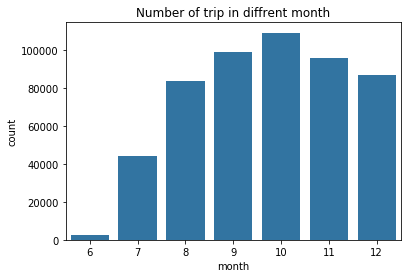

In [11]:
base_color = sb.color_palette()[0]
sb.countplot(data=df,x='month',color=base_color)
plt.title('Number of trip in diffrent month');

- ###  As we see, the most month in which bike rental operations occurred is month 10, and we have a weakness in month 6 ??

In [12]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,month,duration_mun,duration_hour,user_age
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male,12,1335.166667,22.252778,30.0
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female,12,1313.333333,21.888889,52.0
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN,12,762.800000,12.713333,NaN
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN,12,1036.200000,17.270000,NaN
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female,12,726.716667,12.111944,20.0


In [13]:
df.query('duration_mun <180').shape[0]

514258

In [14]:
top_ten_stat=df['start_station_name'].value_counts()[0:10]
print(top_ten_stat)

San Francisco Ferry Building (Harry Bridges Plaza)           15187
The Embarcadero at Sansome St                                13664
San Francisco Caltrain (Townsend St at 4th St)               12546
San Francisco Caltrain Station 2  (Townsend St at 4th St)    12055
Market St at 10th St                                         11960
Montgomery St BART Station (Market St at 2nd St)             11334
Berry St at 4th St                                           10956
Powell St BART Station (Market St at 4th St)                 10142
Howard St at Beale St                                         9926
Steuart St at Market St                                       9347
Name: start_station_name, dtype: int64


In [15]:

top_ten_stat=pd.DataFrame({'stat_name':top_ten_stat.index,'time':top_ten_stat.values})

> ### Here we will see which station has the most rental bicycles ?

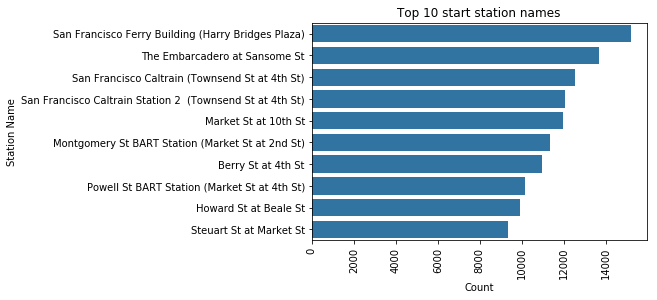

In [16]:
base_color = sb.color_palette()[0]
sb.barplot(data=top_ten_stat,x='time',y='stat_name',color=base_color);
plt.xticks(rotation=90)
plt.xlabel('Count')
plt.ylabel('Station Name')
plt.title('Top 10 start station names');


> ###  We also found that  a San Francisco Ferry Buuliding  station  it has 12,000 rental operations, and this means that a large number of bicycles must be placed in this station to meet the need

> ### here we want to cheak our destrebution for ages of our customer and destrebution of duration in hours

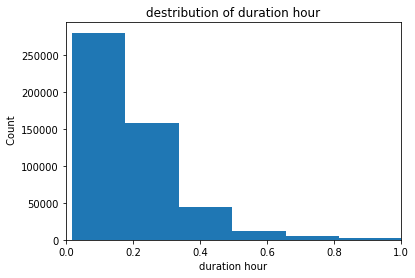

In [17]:


plt.hist(data=df,x='duration_hour',bins=150)
plt.xlim([0,1])
plt.xlabel('duration hour')
plt.ylabel(' Count')
plt.title('destribution of duration hour');



/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


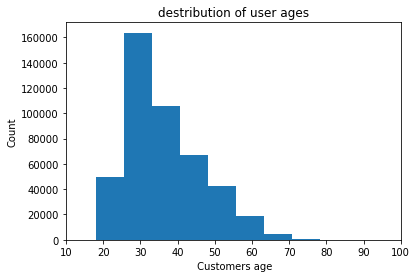

In [18]:
plt.hist(data=df,x='user_age',bins=15)
plt.xlim([10,100])
plt.xlabel(' Customers age')
plt.ylabel('Count')
plt.title('destribution of user ages');



> ### As we see most of our customers spend between 1 to 30 minutes on bicycles, also as we see in the other drawing, most of our customers are between 25 to 40 years old.

 ### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The duration_hour was skweed  , and most of our customer didn'nt complete more than 30 min   
- and also San Francisco Ferry Buuliding station it has 12,000 rental operations, and this means that a large number of bicycles must be placed in this station to meet the need


 ### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> - The data is tidy , All of values are correct  but I add some needed columns such as : Month , and hour and age

### Bivariate Exploration
> #### In this section, investigate relationships between pairs of variables in your data. Make sure the variables that you cover here have been introduced in some fashion in the previous section (univariate exploration).

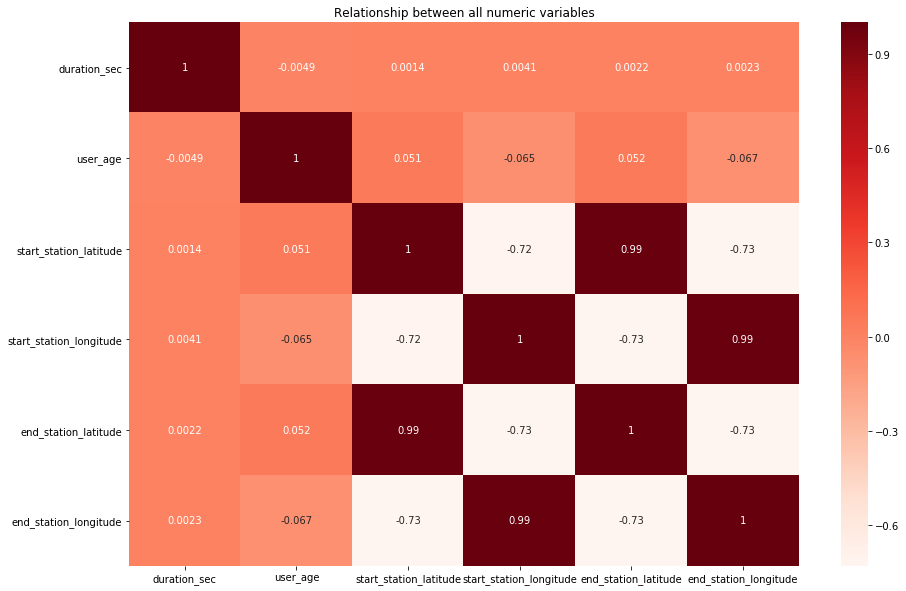

In [19]:
corr=list(['duration_sec','user_age','start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude'])
plt.figure(figsize = [15,10])
sb.heatmap(df[corr].corr(), annot = True,cmap = 'Reds')
plt.title('Relationship between all numeric variables');
plt.show();

### From the heatmap plot we can notice  few strong correlation and we have modrate correlation between user age and  duration in sec

> ### Here we want to see which month happened, more practical to hire, separate customers and subscribers

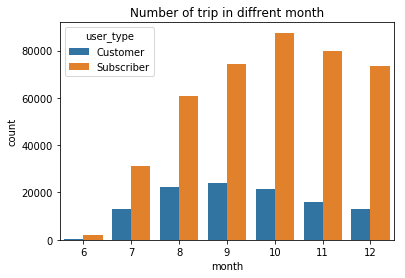

In [20]:
sb.countplot(data=df,x='month',hue='user_type')
plt.title('Number of trip in diffrent month');



> ### We also saw that in Month 10 was the most leasing operation from subscribers, and in Month 9 it was the most leasing operation from customer and also ew noticed that we have A large number of subscribers compared to the number of customers

> ### Here we will see the concentration of data for men and women with the time period

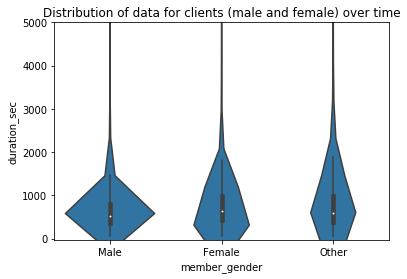

In [28]:
sb.violinplot(data=df, x='member_gender', y='duration_sec', color=base_color, innner=None)
plt.ylim([-30,5000])
plt.title('Distribution of data for clients (male and female) over time')
plt.show();

> ### As we can see, most of the males take less than 700 seconds, or the females there is more diversity

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
- The subscriber has more trips than customers through all duration 
- Also, I thought before seeing the results of the analysis that there would be a strong relationship between hours and age, but the relationship was moderate 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
- there is a strong relationship between months and amount of trips 

### Multivariate Exploration
> Create plots of three or more variables to investigate your data even further. Make sure that your investigations are justified, and follow from your work in the previous sections.

> #### Now we want to see the relationship and the distribution of data between seconds and ages of people, and the division of data into customers and subscribers

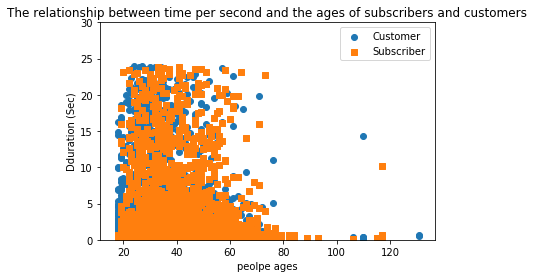

In [22]:
cat_markers = [['Customer', 'o'],
               ['Subscriber', 's']]

for cat, marker in cat_markers:
    df_cat = df[df['user_type'] == cat]
    plt.scatter(data = df_cat, x = 'user_age', y = 'duration_hour', marker = marker)
plt.legend(['Customer','Subscriber'])
plt.ylim([0,30])
plt.title('The relationship between time per second and the ages of subscribers and customers')
plt.ylabel('Dduration (Sec)')
plt.xlabel('peolpe ages')
plt.show();

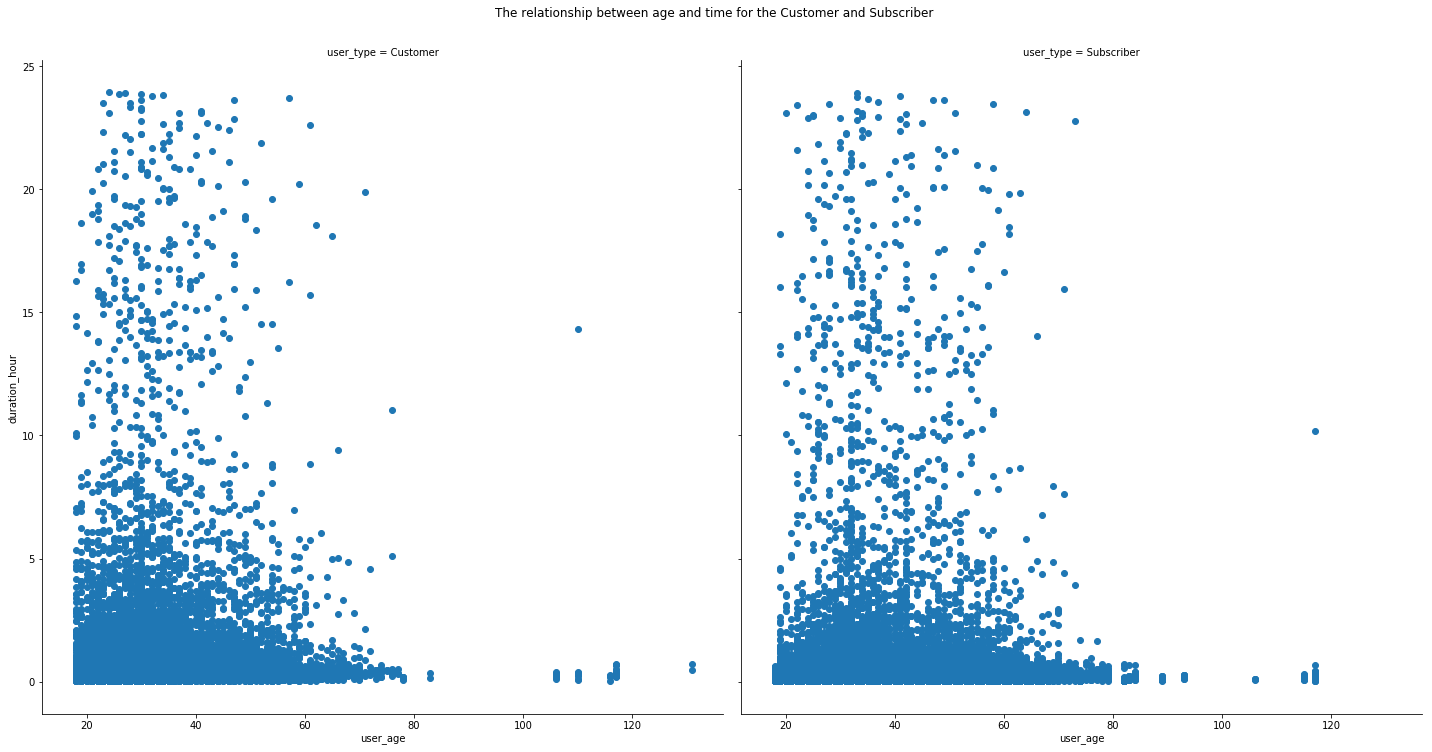

In [21]:
g = sb.FacetGrid(data = df, col = 'user_type', height = 10,margin_titles = True)
g.map(plt.scatter, 'user_age', 'duration_hour');
plt.suptitle("The relationship between age and time for the Customer and Subscriber ", y = 1.04);


- ### We also see that after the age of 60, the older a person gets, the fewer people who will ride bicycles for a longer period.
- #### Also, the behavior of the subscriber is completely identical to the behavior of the customer in this relationship

> ### Now we will add a new column that helps us extract more information. This column will be specific to days of the week, and we will see which days of the week there are people They were spending more time, and we will divide the people except for subscribers and customers

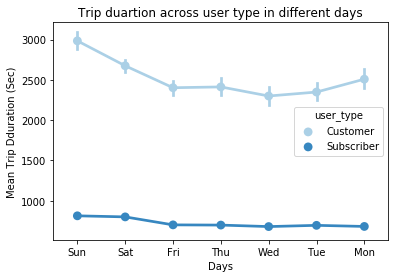

In [24]:
df['day']=df['start_time'].dt.strftime('%a')
sb.pointplot(data = df, x = 'day', y = 'duration_sec', hue = 'user_type', palette = 'Blues')
plt.title('Trip duartion across user type in different days')
plt.ylabel('Mean Trip Dduration (Sec)')
plt.xlabel('Days')
plt.show();

> #### As we see with regard to Customer, they were spending much more time than Subscriber, and sunday  was the most frequent day for clients to spend time on bicycles.

> ### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
> #### the behavior of the subscriber is completely identical to the behavior of the customer in this relationship

> ### Were there any interesting or surprising interactions between features?
> #### we found that sunday is most day people have spent time   

In [ ]:
!jupyter nbconvert /Users/azizaziz/Desktop/lastproject/presentation.ipynb --to slides --post serve  --no-input --no-prompt

[NbConvertApp] Converting notebook /Users/azizaziz/Desktop/lastproject/presentation.ipynb to slides
[NbConvertApp] Writing 597986 bytes to /Users/azizaziz/Desktop/lastproject/presentation.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/presentation.slides.html
Use Control-C to stop this server
